# RED PESADA

In [1]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
import random as r
import scipy.sparse as scp
from matplotlib.ticker import PercentFormatter

In [159]:
def randomn(N, kav):
    p = kav/(N -1)
    net = nx.fast_gnp_random_graph(N, p, directed = False) 
    #net = nx.barabasi_albert_graph(N, kav) 
    adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast
    return net, adj

def weighted_net(N,adj,a,b):
    adj2 = adj.copy()
    adj2 = scp.csr_matrix.astype(adj2, float)   #Cambia la matriz de adjacencia a tipo float
    for i in range(0,N):
        links = adj2[i,i+1:].indices
        for j in range(0, len(links)):
            peso = r.uniform(0.01, 1)
            #peso = np.random.beta(a,b)
            adj2[i, links[j] + i + 1] = peso
            adj2[links[j] + i + 1,i] = peso
    return adj2

def probren1(prob, n, peso):
    return prob*(peso*(n**2 - 1)/n + 1/n)

def probren2(prob, peso):
    return prob + peso*(1- prob)

def probren3(prob , n , peso):
    if peso > 0.75:
        return 1
    else:
        return 0

def remove_deadz(net,est1,N):
    # Eliminamos los nodos con estado = 2 (removed)
    net2 = net.copy()
    for i in range(0,N):
        if est1[i] == 2:
            net2.remove_node(i)
    return net2

def remove_deadzh(net,est1,N):
    # Eliminamos los nodos con estado = 2 (removed)
    net2 = net.copy()
    for i in range(0,N):
        if est1[i] == 2 or est1[i] == 3:
            net2.remove_node(i)
    return net2

def adjacency_survivors(adj2, est1, N):
    # Hacemos una nueva matriz de adyacencia en la que eliminar los links de los nodos removed
    adj3 = adj2.copy()
    adj3 = adj3.todense()
    for i in range(0,N):
        if est1[i] == 2 or est1[i] == 3: #si el nodo está removed, hay que eliminar sus links
            links = np.where(adj3[i,:] !=0. )[1]
            for l in links:
                adj3[i,l] = 0.
                adj3[l,i] = 0.
    return adj3

def weights_survivor(adj3, N):
    # recuperamos los pesos de cada nodo
    pesos = []
    for i in range(0,N):
        for j in range(i+1,N):
            if adj3[i,j] != 0.:
                pesos.append(adj3[i,j])
    return pesos

In [145]:
print(adj2)
est = [0]*8+[1]+[2]
adj3 = adjacency_survivors (adj2,est,10)
print(adj3[1])
#print(est)
weights_survivor(adj3,N)

  (0, 70)	0.42531671408325694
  (0, 245)	0.6290207773171684
  (0, 978)	0.20453134195514525
  (0, 1080)	0.6107230833772522
  (0, 1359)	0.4426829757374485
  (0, 1529)	0.8044576966516995
  (0, 2322)	0.24043501865426942
  (0, 2349)	0.1046098631341051
  (0, 2534)	0.4149695115201314
  (0, 2657)	0.8805194914275029
  (0, 3105)	0.536743376421205
  (0, 3903)	0.07868486209805733
  (0, 4322)	0.374958670948564
  (0, 4597)	0.10329591970285718
  (0, 4842)	0.297399235705779
  (1, 251)	0.6551112134998378
  (1, 607)	0.08623170177700062
  (1, 684)	0.5636623132700894
  (1, 844)	0.448565359160635
  (1, 1658)	0.3957522070136212
  (1, 1787)	0.26035269242006776
  (1, 2075)	0.8374622937101963
  (1, 2462)	0.1050116691109941
  (1, 2898)	0.12696301219827003
  (1, 3016)	0.9038715967191053
  :	:
  (4997, 3997)	0.25399076066934684
  (4997, 4147)	0.6125651016085502
  (4997, 4393)	0.8456317619521034
  (4998, 1233)	0.32991460566616276
  (4998, 1432)	0.42035553539654025
  (4998, 1534)	0.27367841069835014
  (4998, 1568)	

[0.42531671408325694,
 0.6290207773171684,
 0.20453134195514525,
 0.6107230833772522,
 0.4426829757374485,
 0.8044576966516995,
 0.24043501865426942,
 0.1046098631341051,
 0.4149695115201314,
 0.8805194914275029,
 0.536743376421205,
 0.07868486209805733,
 0.374958670948564,
 0.10329591970285718,
 0.297399235705779,
 0.6551112134998378,
 0.08623170177700062,
 0.5636623132700894,
 0.448565359160635,
 0.3957522070136212,
 0.26035269242006776,
 0.8374622937101963,
 0.1050116691109941,
 0.12696301219827003,
 0.9038715967191053,
 0.5674200504264232,
 0.9724753972237986,
 0.21130766828865868,
 0.601018608650227,
 0.4598131290011017,
 0.8268858836474866,
 0.7070506347420515,
 0.29588156627632456,
 0.4608049651671593,
 0.9360277784249172,
 0.09881944156177809,
 0.1966772996215504,
 0.7112060494427448,
 0.4159130736631449,
 0.23346732176785148,
 0.3380293303507874,
 0.02184610598662915,
 0.6691263432875414,
 0.4321316697401662,
 0.712718991856939,
 0.9069199109090137,
 0.547536294575887,
 0.9064

In [166]:
N = 10
kav = 3
net, adj = randomn(N,kav)
adj2 = weighted_net(N,adj,a,b)

Modelos de epidemia

In [147]:


def SIR_model(N, adj2, beta, alpha, it):
    # "est" es un vector que guarda el estado de cada nodo de la red
    #  est = 0 humano; est = 1 zombie; est = 2 zombie muerto

    est = np.zeros(N, dtype = int)
    est1 = np.zeros(N, dtype = int)

    # paciente zero: el primer infectado por el virus
    pac0 = r.randint(0, N-1)
    est[pac0] = 1
    est1[pac0] = 1

    nH = np.zeros(it, dtype = int)
    nZ = np.zeros(it, dtype = int)
    nR = np.zeros(it, dtype = int)
    suma = np.zeros(it, dtype = int)

    for t in range(0, it): # time

        ##### RECUENTO #####
        nH[t] = len(np.where(est1 == 0)[0])
        nZ[t] = len(np.where(est1 == 1)[0])
        nR[t] = len(np.where(est1 == 2)[0])

        ##### INFECTION #####
        # Identificamos los zombies en la red y las infecciones que producen

        zombies = np.where(est == 1)[0]

        for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie

            z = zombies[i] # nodo z es un zombie
            rel = adj2[z,:].indices # nodos que están conectados con z
            relh = rel[est[rel]==0] # nodos humanos conectados con z

            for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
                betaren = probren3(beta, 10, adj2[z,relh[j]])
                if r.uniform(0, 1) < betaren: # the node is infected
                    est1[relh[j]] = 1 # human turns into zombie
                    print(adj2[z,relh[j]])


        ##### ZOMBIE REMOVAL #####
        # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.

        zombies_removal = np.where(est == 1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
        for i in range(0, len(zombies_removal)):
            if r.uniform(0, 1) < alpha:
                est1[zombies_removal[i]] = 2 

        est = est1
        suma[t] = nH[t] + nZ[t] + nR[t]
        
    return nH, nZ, nR, suma, est1

def SIR_vitals_model(N, adj2, beta, alpha, delta, it):

    # "est" es un vector que guarda el estado de cada nodo de la red
    #  est = 0 humano; est = 1 zombie; est = 2 zombie muerto; est = 3 humano muerto
    est = np.zeros(N, dtype = int)
    est1 = np.zeros(N, dtype = int)

    # paciente zero: el primer infectado por el virus
    pac0 = r.randint(0, N-1)
    est[pac0] = 1
    est1[pac0] = 1

    nH = np.zeros(it, dtype = int)
    nZ = np.zeros(it, dtype = int)
    nRZ = np.zeros(it, dtype = int)
    nRH = np.zeros(it, dtype = int)
    suma = np.zeros(it, dtype = int)

    for t in range(0, it): # time

        ##### RECUENTO #####
        nH[t] = len(np.where(est1 == 0)[0])
        nZ[t] = len(np.where(est1 == 1)[0])
        nRZ[t] = len(np.where(est1 == 2)[0])
        nRH[t] = len(np.where(est1 == 3)[0])

        ##### INFECTION #####
        # Identificamos los zombies en la red y las infecciones que producen

        zombies = np.where(est == 1)[0]

        for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie

            z = zombies[i] # nodo z es un zombie
            rel = adj2[z,:].indices # nodos que están conectados con z
            relh = rel[est[rel]==0] # nodos humanos conectados con z

            for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
                betaren = probren3(beta, 3, adj2[z,relh[j]])
                if r.uniform(0, 1) < betaren: # the node is infected
                    est1[relh[j]] = 1 # human turns into zombie


        ##### ZOMBIE REMOVAL #####
        # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
        zombies_removal = np.where(est==1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
        for i in range(0, len(zombies_removal)):
            if r.uniform(0, 1) < alpha:
                est1[zombies_removal[i]] = 2 

        ##### HUMAN REMOVAL #####
        human_removal = np.where(est1==0)[0] # buscamos los humanos que quedan 
        for i in range(0, len(human_removal)):
            if r.uniform(0, 1) < delta:
                est1[human_removal[i]] = 3 

        est = est1
        suma[t] = nH[t] + nZ[t] + nRZ[t] + nRH[t]
    
    return nH, nZ, nRZ, nRH, suma, est1

def SIR_vitals_mil_model(N, adj2, beta, alpha, delta, nu, eta, factor, gamma, it):
    
    nB = 100 # factor de renormalización de la beta en función del peso del link
    
    # mu = probabilidad de convertirse en militar al sobrevivir a un encuentro con un zombie
    # eta = probabilidad de que un militar transforme en militar a un humano
    # factor = factor de reducción de la probabilidad de contagiarse de un militar
    # gamma = probabilidad de que un militar mate un zombie


    # "est" es un vector que guarda el estado de cada nodo de la red
    #  est = 0 humano; 
    # est = 1 zombie; 
    # est = 2 zombie muerto; 
    # est = 3 humano muerto; 
    # est = 4 militar

    est = np.zeros(N, dtype = int)
    est1 = np.zeros(N, dtype = int)

    # paciente zero: el primer infectado por el virus
    pac0 = r.randint(0, N-1)
    est[pac0] = 1
    est1[pac0] = 1

    nH = np.zeros(it, dtype = int)
    nZ = np.zeros(it, dtype = int)
    nRZ = np.zeros(it, dtype = int)
    nRH = np.zeros(it, dtype = int)
    nM = np.zeros(it, dtype = int)

    suma = np.zeros(it, dtype = int)

    for t in range(0, it): # time

        ##### RECUENTO #####
        nH[t] = len(np.where(est1 == 0)[0])
        nZ[t] = len(np.where(est1 == 1)[0])
        nRZ[t] = len(np.where(est1 == 2)[0])
        nRH[t] = len(np.where(est1 == 3)[0])
        nM[t] = len(np.where(est1 == 4)[0])

        ##### INFECTION PARA MILITARES #####

        # Identificamos los zombies en la red y las infecciones que producen
        zombies = np.where(est == 1)[0]

        for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie

            z = zombies[i] # nodo z es un zombie
            rel = adj2[z,:].indices # nodos que están conectados con z
            relm = rel[est[rel] == 4] # nodos militares conectados con z

            for j in range(0, len(relm)): # para cada nodo militar conectado con un zombie, comprobamos si está infectado
                betaren = probren3(beta, nB/5, adj2[z,relm[j]])
                if r.uniform(0, 1) < betaren*factor: # the node is infected
                    est1[relm[j]] = 1 # militar turns into zombie
                if r.uniform(0,1) < gamma:
                    est1[z] = 2


        ##### INFECTION PARA HUMANOS #####

        # Identificamos los zombies en la red y las infecciones que producen
        zombies = np.where(est == 1)[0]

        for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie

            z = zombies[i] # nodo z es un zombie
            rel = adj2[z,:].indices # nodos que están conectados con z
            relh = rel[est[rel]==0] # nodos humanos conectados con z

            for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado
                betaren = probren3(beta, nB/5, adj2[z,relh[j]])
                if r.uniform(0, 1) < betaren: # the node is infected
                    est1[relh[j]] = 1 # human turns into zombie
                else: # si el humano sobrevive al encuentro con el zombie, se convierte en militar
                    if r.uniform(0,1) < nu:
                        est1[relh[j]] = 4


        ##### ZOMBIE REMOVAL #####
        # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.
        zombies_removal = np.where(est==1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
        for i in range(0, len(zombies_removal)):
            if r.uniform(0, 1) < alpha:
                est1[zombies_removal[i]] = 2 

        ##### HUMAN/MILLITAR REMOVAL #####
        human_mil_removal = np.sort(np.concatenate((np.where(est1 == 0)[0],
                                                    np.where(est1 == 4)[0]), axis = None)) # buscamos los humanos y militares que quedan 
        for i in range(0, len(human_mil_removal)):
            if r.uniform(0, 1) < delta:
                est1[human_mil_removal[i]] = 3 

        #### HUMAN - MILLITAR ENCOUNTER ####
        # Identificamos los militares en la red y los humanos con los que están conectados
        mills = np.where(est == 4)[0]

        for i in range(0, len(mills)): # tenemos que buscar los contactos con humanos de cada zombie

            m = mills[i] # nodo z es un zombie
            rel = adj2[m,:].indices # nodos que están conectados con m
            relh = rel[est[rel]==0] # nodos humanos conectados con m

            for j in range(0, len(relh)): # para cada nodo humano conectado con un militar
                etaren = probren3(prob, nB, adj2[m,relh[j]] )
                if r.uniform(0, 1) < etaren: # the node is transformed
                    est1[relh[j]] = 4 # human turns into millitary


        est = est1
        suma[t] = nH[t] + nZ[t] + nRZ[t] + nRH[t] + nM[t]
    
    return nH, nZ, nRH, nRZ, nM, suma, est1



# RED

In [168]:
N = 1000
kav = 10
a = 1
b = 3
net, adj = randomn(N,kav)
adj2 = weighted_net(N,adj,a,b)

# MODELO SIR

In [161]:
it = 300
beta = 0.1
alpha = 0.03
nH, nZ, nR, suma, est1 = SIR_model(N, adj2, beta, alpha, it)


0.9307289186173181
0.8002159878505088
0.9183212388106525
0.9210989719645046
0.7776239455076979
0.7672649703770563
0.7939267236309058
0.9507700207852953
0.883974744054825
0.7540567967930452
0.9424073630711581
0.9145561197584111
0.9725532116204999
0.917237053199923
0.7720164912702095
0.8048689923110584
0.8212819067726972
0.8304234439570843
0.9401020480049512
0.8839060976070305
0.970162274787313
0.8280038883671758
0.8782231949706284
0.8765928064313436
0.9884988926383349
0.8435821780213147
0.8230128467941571
0.9602084437370305
0.7973950318922971
0.8327065697584223
0.9131246518120385
0.8527499390567415
0.9385444237823758
0.9864891480543377
0.9072639212182833
0.7837972481794095
0.8505752921128221
0.8362529725240807
0.7711444705575129
0.8664468468527926
0.7581111033728817
0.8585663272688041
0.8426572888252666
0.8028411050718
0.7554548049073919
0.8619947355058034
0.8900059284251204
0.7565731898279138
0.8509533267589061
0.9955506969681697
0.8619778014634745
0.7785085454860816
0.9554488236410137

0.9319814462252013
0.8827827840534611
0.8527205594073294
0.9663170174924756
0.7707914977162583
0.8228771309628901
0.9754490888843621
0.7916322259621212
0.9332417100366057
0.9807022774238744
0.8957236908543335
0.9231095915524363
0.8015620046886561
0.8982062277636802
0.9916913262396955
0.7958688273828679
0.8859185343368768
0.8695238254685536
0.8547565710430303
0.8878956882264525
0.8160747368321672
0.8893883436149068
0.7697192749922421
0.9131219672691222
0.8989571259733715
0.7932558628881968
0.885945918454118
0.8089431972309241
0.7837284169741005
0.8983985161650734
0.8048418523332319
0.7510871962518199
0.7658092222491985
0.9262333502780821
0.857735778486473
0.8601772505515162
0.9224340329107132
0.8993208052832095
0.9151668664858174
0.7835687526783723
0.9785204700523018
0.857723765606201
0.8469661839646055
0.8554357965424931
0.8590028027158767
0.9931580780411559
0.9916271659222236
0.846976222313582
0.8741115894700046
0.8493997483043407
0.9378428162602539
0.7817020430555854
0.86362898352295

In [162]:
sum(pesos)/len(pesos)

0.49818974879147404

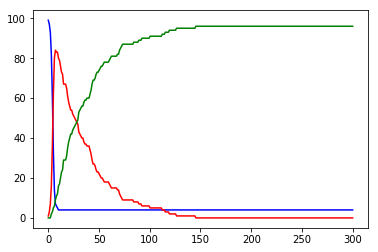

In [150]:
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nR, color = 'green')

In [163]:
net2 = remove_deadz(net,est1,N)

In [140]:
# asignamos colores a los nodos que tienen estado = 0 (humanos), estado = 1 (zombies)
color_list = []
for i in range(0,N):
    if est1[i] == 0:
        color_list.append('blue')
    elif est1[i] == 1:
        color_list.append('red')

In [141]:
pos = nx.spring_layout(net2)
#pos = nx.fruchterman_reingold_layout(net2, seed = RandomState)

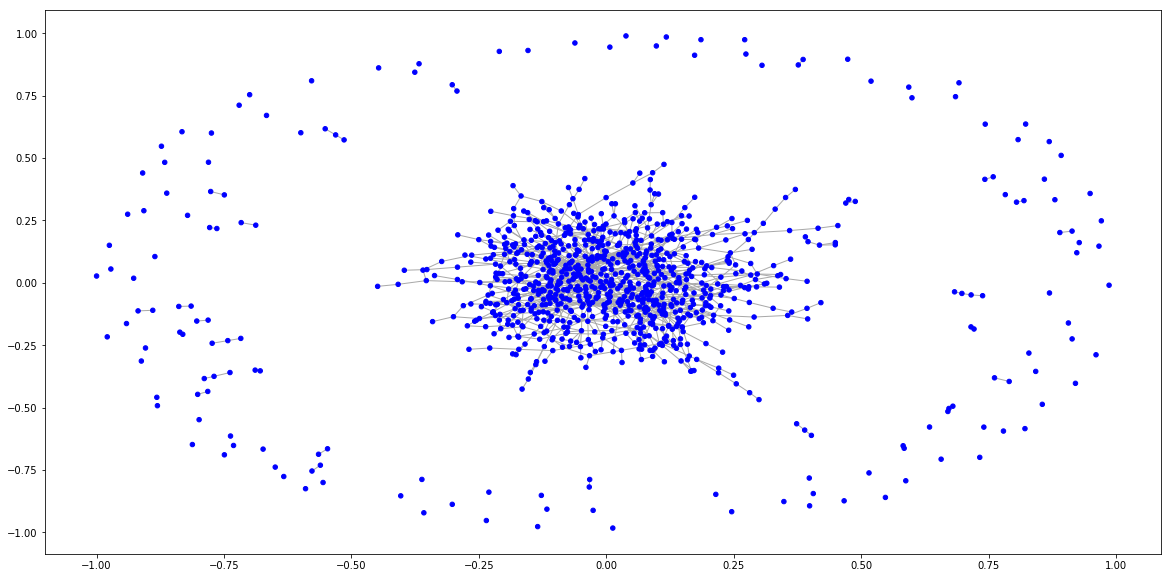

In [142]:
plt.figure(figsize=(20,10))
nx.draw_networkx(net2, with_labels = False, pos = pos, 
                 node_color = color_list, node_size = 20, edge_color = 'darkgray')
plt.show()

In [165]:
adj3 = adjacency_survivors(adj2, est1, N)
pesos = weights_survivor(adj3,N)
sum(pesos)/len(pesos)

0.5073757696238522

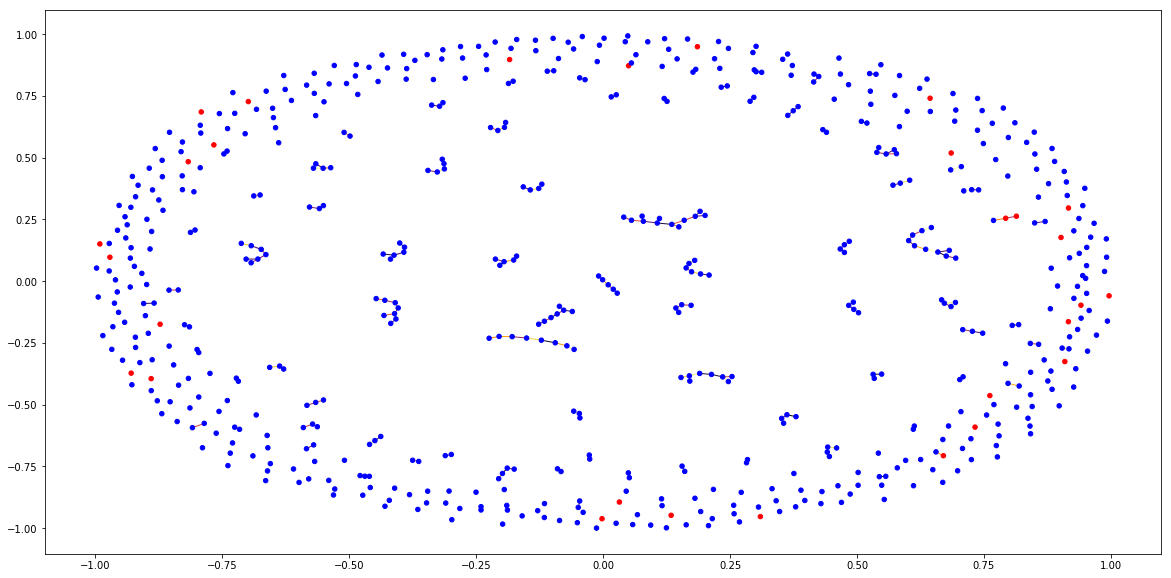

In [57]:
plt.figure(figsize=(20,10))
nx.draw_networkx(net2, with_labels = False, pos = pos, node_color = color_list, 
        node_size = 20, edge_color = pesos, edge_cmap = plt.cm.get_cmap('inferno'), edge_vmin=0, edge_vmax=1)
plt.show()

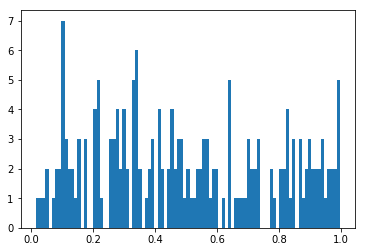

In [152]:
plt.hist(pesos, bins = 95)
plt.show()

# MODELO SIR + vitals

In [ ]:
N = 5000
kav = 10
#net, adj = randomn(N,kav)
#adj2 = weighted_net(N,adj)

it = 150
beta = 0.009
alpha = 0.05
delta = 0.002
nH, nZ, nRZ, nRH, suma, est1 = SIR_vitals_model(N, adj2, beta, alpha, delta, it)

In [ ]:
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nRZ, color = 'green')
plt.plot( np.linspace(0,it,it), nRH, color = 'orange')
plt.plot( np.linspace(0,it,it), suma, '--', color = 'black', linewidth = 0.8)

In [ ]:
net2 = remove_deadzh(net,est1,N)
# asignamos colores a los nodos que tienen estado = 0 (humanos), estado = 1 (zombies)
color_list = []
for i in range(0,N):
    if est1[i] == 0:
        color_list.append('blue')
    elif est1[i] == 1:
        color_list.append('red')
pos = nx.spring_layout(net2)
adj3 = adjacency_survivors(adj2, est1, N)
pesos = weights_survivor(adj3,N)
plt.figure(figsize=(20,10))
nx.draw_networkx(net2, with_labels = False, pos = pos, node_color = color_list, 
        node_size = 20, edge_color = pesos, edge_cmap = plt.cm.get_cmap('inferno'), edge_vmin=0, edge_vmax=1)
plt.show()

In [ ]:
plt.hist(pesos, bins = 20)

# MODELO SIR + vitals + militares

In [52]:
beta = 0.02 # infection probability in a zombie-human encounter
alpha = 0.05 # zombie removal probability
delta = 0.001 # human removal probability

# mu = probabilidad de convertirse en militar al sobrevivir a un encuentro con un zombie
# eta = probabilidad de que un militar transforme en militar a un humano
# factor = factor de reducción de la probabilidad de contagiarse de un militar
# gamma = probabilidad de que un militar mate un zombie

nu = 0.02 # probabilidad de convertirse en militar al sobrevivir a un encuentro con un zombie
eta = 0.02 # probabilidad de que un militar transforme en militar a un humano
factor = 0.7 
gamma = 0.08 # probabilidad de que un militar mate un zombie

it = 60
nH, nZ, nRH, nRZ, nM, suma, est1 = SIR_vitals_mil_model(N, adj2, beta, alpha, delta, nu, eta, factor, gamma, it)

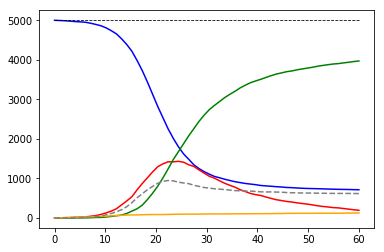

In [53]:
plt.plot( np.linspace(0,it,it), nH + nM, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nRZ, color = 'green')
plt.plot( np.linspace(0,it,it), nRH, color = 'orange')
plt.plot( np.linspace(0,it,it), nM, '--', color = 'grey')
plt.plot( np.linspace(0,it,it), suma, '--', color = 'black', linewidth = 0.8)

In [54]:
net2 = remove_deadzh(net, est1, N)
pos = nx.spring_layout(net2, k = 0.1)

In [55]:
# asignamos colores a los nodos que tienen estado = 0 (humanos), estado = 1 (zombies)
color_list = []
for i in range(0,N):
    if est1[i] == 0:
        color_list.append('blue')
    elif est1[i] == 1:
        color_list.append('red')
    elif est1[i] == 4:
        color_list.append('orange')

In [56]:
adj3 = adjacency_survivors(adj2, est1, N)
pesos = weights_survivor(adj3,N)

In [57]:
len(pesos)

612

In [58]:
net2.number_of_edges()

612

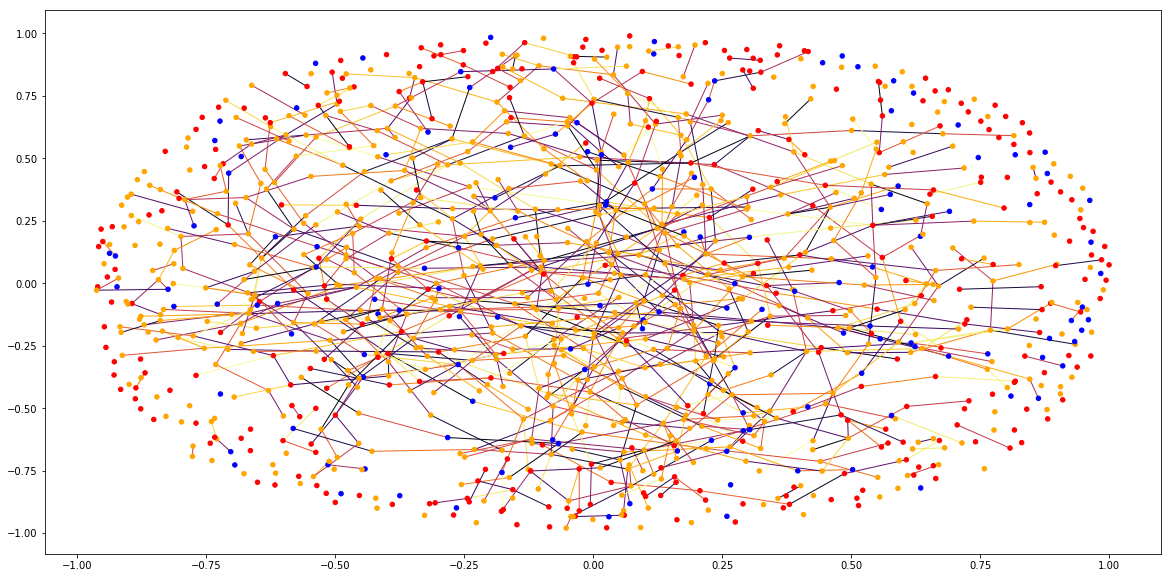

In [48]:
plt.figure(figsize=(20,10))
nx.draw_networkx(net2, with_labels = False, pos = pos, node_color = color_list, 
        node_size = 20, edge_color = pesos, edge_cmap = plt.cm.get_cmap('inferno'), edge_vmin=0, edge_vmax=1)
plt.show()

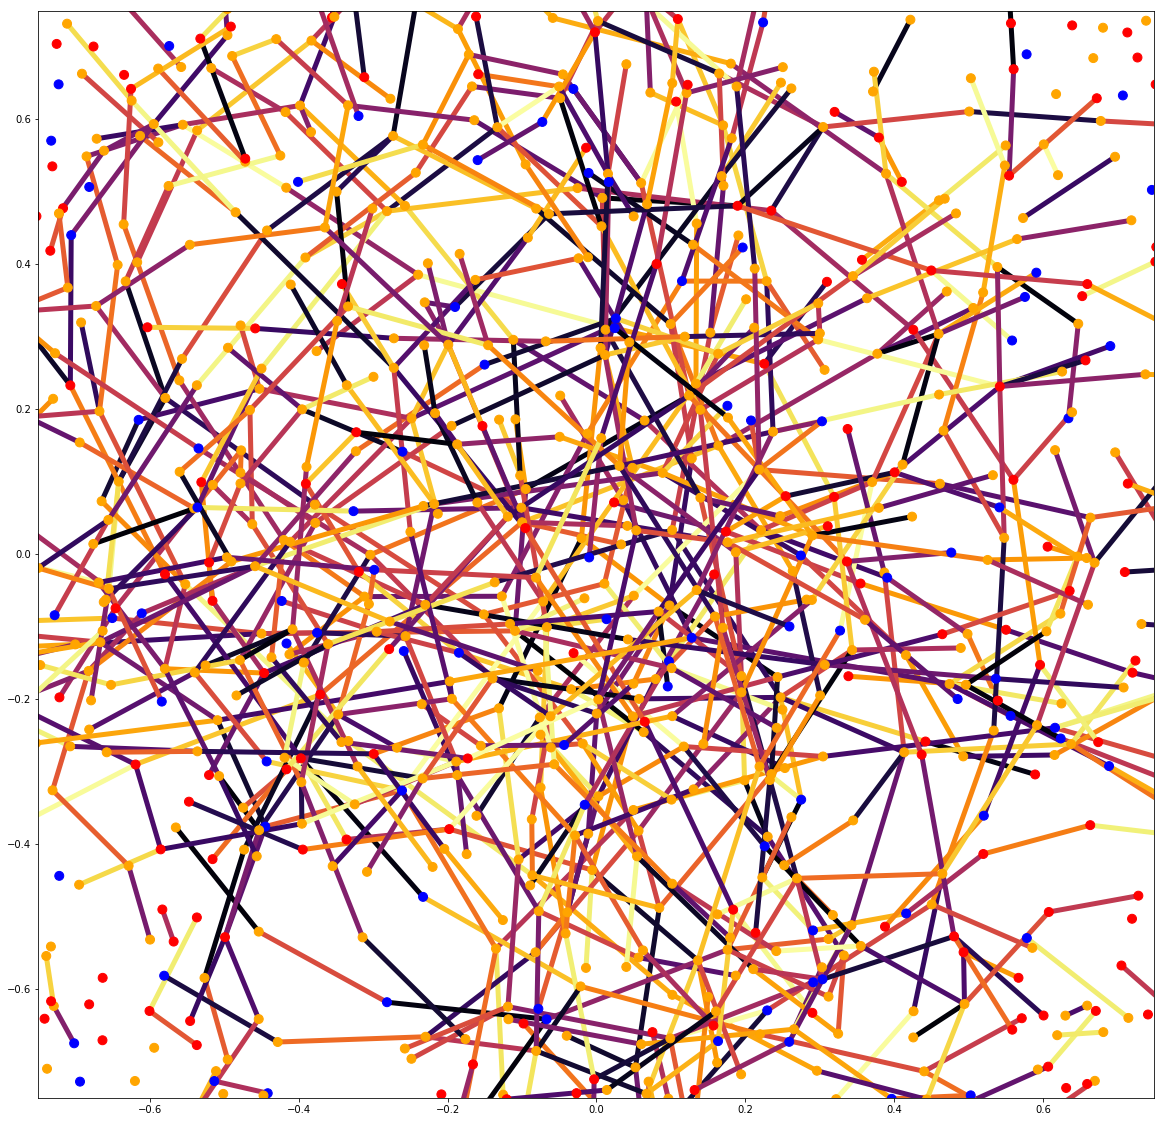

In [50]:
plt.figure(figsize=(20,20))
nx.draw_networkx(net2, with_labels = False, pos = pos, node_color = color_list, 
        node_size = 80, edge_color = pesos, edge_cmap = plt.cm.get_cmap('inferno'), 
                 edge_vmin=0, edge_vmax=1, width = 5)
plt.axis([-0.75,0.75,-0.75,0.75])
plt.show()

(array([17., 17., 29., 18., 14., 19., 19., 20., 17., 25., 24., 28., 18.,
        13., 21., 22., 31., 20., 20., 15., 17., 14., 22., 21., 23., 24.,
        22., 16., 26., 20.]),
 array([0.0109107 , 0.04385839, 0.07680608, 0.10975377, 0.14270146,
        0.17564915, 0.20859684, 0.24154453, 0.27449222, 0.30743991,
        0.3403876 , 0.37333529, 0.40628298, 0.43923067, 0.47217836,
        0.50512605, 0.53807374, 0.57102143, 0.60396912, 0.63691681,
        0.6698645 , 0.70281219, 0.73575988, 0.76870757, 0.80165526,
        0.83460295, 0.86755064, 0.90049833, 0.93344602, 0.96639371,
        0.9993414 ]),
 <a list of 30 Patch objects>)

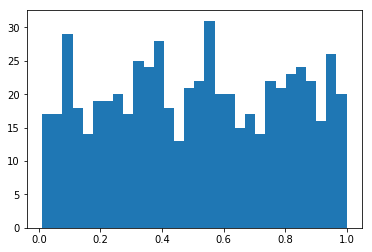

In [61]:
plt.hist(pesos, bins = 30)

In [18]:
len(pesos)

2829